# TP1 Transfert de chaleur en milieu poreux

__5 séances__

L'objectif est de développer un module python qui résout le transfert de chaleur en milieu poreux en régime transitoire thermique.


## 1. L'interface nappe-rivière en régime permanent

L'interface nappe-rivière est ici représentée par une portion de zone hyporhéique mono-dimensionnelle de hauteur h.

Le couple d'équations régissant le transfert de chaleur correspond d'une part à la résolution du régime permanent hydraulique (loi de Darcy):

$ \boldsymbol{q} = -K \boldsymbol{\nabla} H $

couplée à l'équation de transfert de chaleur

$ \rho_w c_w \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta - \lambda_m \Delta \theta = 0 $


avec $\boldsymbol{q}$, le débit spécifique [$m.s^{-1}$],  
$H$, la charge [$m$]  
$K$, la perméabilité [$m.s^{-1}$],  
$\theta$, la température [$K$],  
$\rho_w$, la densité de l'eau [$kg.m^{-3}$],  
$c_w$ la capacité calorifique spécifique de l'eau [$J.kg^{-1}.K^{-1}$],  
$\lambda_m$ [$W.m^{-1}.K^{-1}$] la conductivité thermique du milieu poreux équivalent, avec $\lambda_m = \left( n \sqrt{\lambda_w} + (1-n) \sqrt{\lambda_s} \right)^2$ où $n$ est la porosité du milieu, et les indices $w$ et $s$ dénotent respectivement l'eau et le solide pur.

$\boldsymbol{\nabla}$ est un opérateur différenciel et $\Delta$ le Laplacien. 
Les symboles en gras représentent des vecteurs. 

Afin de rendre le programme générique permettant éventuelelment de prendre en compte les effets de température sur les propriétés de l'eau, la loi de Darcy est écrite dans sa version intrinsèque :

$ \boldsymbol{q} = - \frac{k \rho_w g}{\mu_w} \boldsymbol{\nabla} H $

avec where $k$ la perméabilité intrinsèque de l'eau [$m^2$],  
$g$ la constante gravitaire [$m.s^{-2}$],  
$\mu_w$ la viscosité dynamique de l'eau [$kg.s^{-1}$].


Le système expérimental MOLONARI (MOnitoring LOcal des échanges NAppe-RIvière) permet de mesurer la différence de pression entre le haut et le bas de la colonne.


### 1.1. Discrétiser l'équation en différences finies

Il s'agit ici de discrétiser l'équation du transfert de chaleur en régime permanent en différences finies.
Le problème est mono-dimensionnel vertical (une colonne de sol).

On considère un repère orienté vers le bas avec le 0 à la surface du sol.

Discrétiser les conditions limites de température qui sont imposées en haut et en bas de la colonne, soit aux faces.

On suppose que la colonne comprend n cellules, les conditions limites de température sont donc imposées aux faces 1/2 et n+1/2.


### Réponse 1.1

$ \rho_{w} c_{w} q \cdot \nabla \theta-\lambda_{m} \Delta \theta=0 $

On discrétise en nommant le pas z. On obtient : 

$ \rho_{w} c_{w} q \cdot \frac{\theta_{i+1}- \theta_{i}}{z}-\lambda_{m} \cdot \frac{\theta_{i+2}- 2\cdot\theta_{i+1} + \theta_{i}}{z^{2}}=0 $

On groupe par théta : 

$ \theta_{i+2} \cdot \lambda_{m} - \theta_{i+1} \cdot (z \rho_{w} c_{w} q + 2 \lambda_{m}) + \theta_{i} \cdot (z \rho_{w} c_{w} q + \lambda_{m}) = 0$


### 1.2. Formalisation du maillage, des variables d'état et des paramètres

En python, formaliser le maillage, identifier les variables d'état, les paramètres et les conditions limites.
Ecrire le code nécessaire à la lecture de ces données.


### Réponse 1.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#les variables d'états sont :
lam_w = 0.598 #conducitivté thermique de l'eau en W.m-1.K-1
rho = 1000 #masse volumnique de l'eau en kg par m-3
c = 4180 #capacité calorifique spécifique de l'eau en J.kg-1.K-1

#les paramètres sont :
n = 100 #nombre de cases
z = 0.01 #pas en mètres

#grandeur physiques qu'on fera varier dans la suite du modèle
lam_s = 2 #conductivité thermique du solide pur de la zone hyporhéique en W.m-1.K-1
K = 10**(-5) #perméabilité du milieu en m.s-1
poro = 0.15 #porosité du milieu poreux


#les conditions aux limites sont :
t_riv = 29 #la température au fond de la rivière en K
t_aqui = 12 #la température de l'aquifère en K
dh = 0.05 #différentiel de charge hydraulique en mètres




### 1.3. Ecrire le code de résolution du système matriciel

On pourra se baser ici sur numpy.
Le code s'appuie sur la discrétisation de l'équation du transport de la chaleur écrite en 2. 





### Réponse 1.3

In [2]:
def calcul_matrice(n, t_riv, t_aqui, lam_s, lam_w, rho, z, c, K, dh, poro):
    lam = (poro*np.sqrt(lam_w)+(1-poro)*np.sqrt(lam_s))**2 #calcul de la conductivité du milieu équivalent
    q = -K*dh #calcul du débit par loi de Darcy
    A = np.zeros(shape=(n,n))
    A[0][0]=1
    A[n-1][n-1]=1
    B = np.zeros(shape=(n,1)) 
    B[0]=t_riv
    B[n-1]=t_aqui
    for i in range(1, n-1):
        A[i][i-1]= z*rho*c*q+lam
        A[i][i]=-z*rho*c*q-2*lam
        A[i][i+1]=lam
    #une fois la matrice A créée et le vecteur colonne B on a : AT=B ou T serait le vecteur colonne des températures
    return np.linalg.solve(A, B)

### 1.4. Sorties du code

Ecrire les champs de températures dans un fichier.
Ecrire une procédure de visualisation des champs de température. On pourra se baser ici sur matplotlib




### Réponse 1.4

In [3]:
def print_courbe(n, t_riv, t_aqui, lam_s, lam_w, rho, z, c, K, dh, poro):
    Courbe = calcul_matrice(n, t_riv, t_aqui, lam_s, lam_w, rho, z, c, K, dh, poro)
    Courbe = np.flip(Courbe)
    plt.plot(Courbe, np.linspace(-1,0,100))
    plt.grid()
    plt.ylabel('Profondeur')
    plt.xlabel('Température')
    plt.title('Profil de température')
    plt.show()

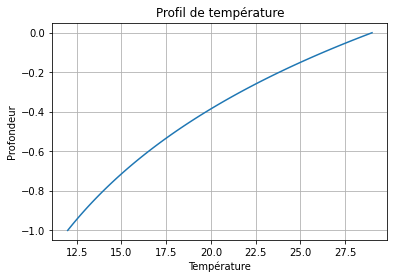

In [4]:
print_courbe(n, t_riv, t_aqui, lam_s, lam_w, rho, z, c, K, dh, poro)

### 1.5. Ecrire une fonctionnalité du code permettant l'analyse de sensibilité

Il s'agit d'écrire une méthode permettant de lancer un calcul direct en spécifiant les valeurs des trois paramètres intervenant dans le système d'équations : 
+ la perméabilité 
+ la conductivité thermique 
+ la porosité cinématique


### Réponse 1.5

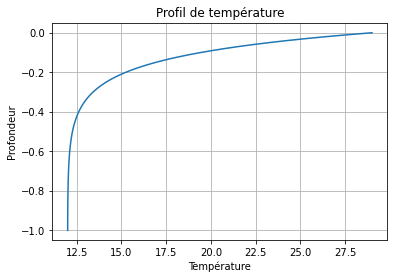

In [5]:
#on peut faire varier les valeurs de nos 3 paramètres
k = 8*10**(-5)
lam_s = 3
poro = 0.3

print_courbe(n, t_riv, t_aqui, lam_s, lam_w, rho, z, c, k, dh, poro)

En prenant les nouvelles valeurs suivantes : porosité de 0.3 (augmentation), conductivité du solide de 3 W.m-1.K-1(augmentation), perméabilité de l'eau de 8.10-5 m.s-1. On observe que pour ces valeurs là la rivière atteint plus vite (moins profond) la température de l'aquifère.
Un changement de porosité, de perméabilité et de conductivité correspond à un changement d'aquifère (type de roche en contact avec la rivière). 

## 2. Régime thermique transitoire


### 2.1 Forme générale


On considère la convention de notation suivante. $\boldsymbol{\nabla}$ est un opérateur différenciel et $\Delta$ le Laplacien. 
Les symboles en gras représentent des vecteurs. 

L'interface nappe-rivière est ici représentée par une portion de zone hyporhéique mono-dimensionnelle de hauteur h.

Le couple d'équations régissant le transfert de chaleur correspond d'une part à la résolution du régime permanent hydraulique (loi de Darcy):

$ \boldsymbol{q} = -K \boldsymbol{\nabla} H $

avec $\boldsymbol{q}$, le débit spécifique [$m.s^{-1}$],  
$H$, la charge [$m$]  
$K$, la perméabilité [$m.s^{-1}$],

Le système expérimental MOLONARI (MOnitoring LOcal des échanges NAppe-RIvière) permet de mesurer la différence de pression entre le haut et le bas de la colonne, qui est ainsi une donnée d'entrée du problème. A perméabilité considérée homogène le long de la colonne, le débit est ainsi évaluable pour le couplage avec l'équation de transfert de chaleur en régime permanent :

$\rho_m c_m \dfrac{\partial \theta}{\partial t} = - \rho_w c_w \boldsymbol{q} \cdot \boldsymbol{\nabla} \theta + \lambda_m \Delta \theta$

avec $\theta$, la température [$K$],  
$\rho_i$, la densité de i [$kg.m^{-3}$],  
$c_i$ la capacité calorifique spécifique de i [$J.kg^{-1}.K^{-1}$],  
$\lambda_i$ [$W.m^{-1}.K^{-1}$] la conductivité thermique de i,
où $i \in {s,w,m}$, avec s solide, w eau, m milieu poreux equivalent. 

$c_m\rho_m$ est estimé à partir de moyenne volumique pondérée par la porosité $n$ du milieu, $ \rho_m c_m = n \rho_w c_w + (1 - n) \rho_s c_s $

La conductivité thermique du milieu poreux équivalent est estimée par la relation $\lambda_m = \left( n \sqrt{\lambda_w} + (1-n) \sqrt{\lambda_s} \right)^2$.

### 2.2 Réduction de l'espace des paramètres

L'équation de transport de la chaleur peut être réécrite sous la forme :


$ \dfrac{\partial \theta}{\partial t} = \kappa_e \Delta \theta + 
\alpha_e \boldsymbol{\nabla} H \cdot \boldsymbol{\nabla} \theta $

avec $ \kappa_e = \dfrac{\lambda_m}{ \rho_m c_m }  $

$ \alpha_e = \dfrac{\rho_w c_w}{ \rho_m c_m} K $


$\kappa_e$ [$m^2 s^{-1}$] et $\alpha_e$ [$m s^{-1}$] sont des paramètres effectifs, dénommés respectivement conductivité effective (parfois dénommée effective diffusivité thermique) et paramètre advectif effectif.

### 2.3 Propagation d'un signal périodique dans un milieu semi infini

Il existe une solution analytique, fournie par Stallman (1965), à la propagation d'un signal de température sinusoïdal  à la surface d'un milieu poreux soumis à une différence de pressions ($\Delta H$) constante au cours du temps. Le signal sinusoïdal est apliqué en haut de la colonne, dans un repère dont l'origine est en haut de la colonne et orienté vers le bas. Il a une amplitude  $\theta_{amp}$ et une période P autour d'une valeur moyenne $\theta_{\mu}$. Cette solution s'écrit :

$ \theta(z,t)  = \theta_{\mu} + \theta_{amp} e^{-az} \cos\left( \dfrac{2 \pi}{P} t - b z \right) $  [eq.1]

avec 
$ a  = \dfrac{1}{2 \kappa_e} \left( \sqrt{\dfrac{\sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } + v_t^2}{2}} - v_t \right) $, 

$ b  = \dfrac{1}{2 \kappa_e}  \sqrt{\dfrac{\sqrt{v_t^4 + (8 \pi \kappa_e / P)^2 } - v_t^2}{2}} $, 

$ v_t  = - \alpha_e \dfrac{\partial H}{\partial z} $


Dans le cas conductif pur, la solution analytique s'écrit:

$ \theta(z,t)  = \theta_{\mu} + \theta_{amp} e^{-\sqrt{\dfrac{\pi}{\kappa_e P}}z} \cos\left( \dfrac{2 \pi}{P} t - \sqrt{\dfrac{\pi}{\kappa_e P}} z \right) $  [eq.1cond]



### 2.4 Etude de cas

Considérons une colonne de sol de 8 m de profondeur avec la conductivité thermique équivalente $\lambda_m = 1 W.m^{-1}.K^{-1}$, la porosité $ n = 0.15$, et la capacité calorifique équivalente $\rho_m c_m =  4e6 J.m^{-3}.K^{-1}$. La perméabilité est fixée à $8.10^{-4} m.s^{-1}$. 

#### 2.4.1 Réponse de la zone hyporhéique à une sollicitation thermique périodique

On considère un signal périodique en surface d'amplitude 1 K et une période de 720 heures (30 jours) autour d'un température moyenne de 12 °C.

##### 2.4.1.1 Evolution de la température dans le milieu

Tracer le profil des températures toutes les 30 heures pour les trois cas suivants :

+ 1. vitesse de darcy vers le haut de 1e-6 $m. s^{-1}$
+ 2. profil conductif pur
+ 3.  vitesse de darcy vers le bas de 1e-6 $m. s^{-1}$

Avant de démarrer, écrire une méthode permettant de forcer une simulation à partir de paramètres thermiques équivalents (conductivité thermique et capacité calorifique).

Tracer également des frises temporelles représentant la matrice des températures dans l'espace (z,t). 

Commentez ces résultats.

In [9]:
profondeur = 8
lambda_m = 1
porosite = 0.15
capacite = 4*10**6  #rho m c m 
permeabilite = 8*10**(-4)   #K
t_moy = 12
amplitude = 1
periode = 720*3600 #P

rho_w_c_w = 1000*4180
alpha_e = rho_w_c_w / capacite * permeabilite 

kappa = lambda_m / capacite #conductivite


In [10]:
def temperature(profondeur, temps, vitesse):
    a = 1/(2*kappa)*(np.sqrt((np.sqrt(vitesse**4 + (8*np.pi*kappa/periode)**2) + vitesse**2)/2) - vitesse)
    b = 1/(2*kappa)*(np.sqrt((np.sqrt(vitesse**4 + (8*np.pi*kappa/periode)**2) - vitesse**2)/2))
    return t_moy + amplitude*np.exp(-a*profondeur)*np.cos(2*np.pi*temps/periode - b*profondeur)

def temperature_conductif_pur(profondeur, temps):
    return t_moy + amplitude*np.exp(-np.sqrt(np.pi/(kappa*periode))*profondeur)*np.cos(2*np.pi*temps/periode - np.sqrt(np.pi/(kappa*periode))*profondeur)

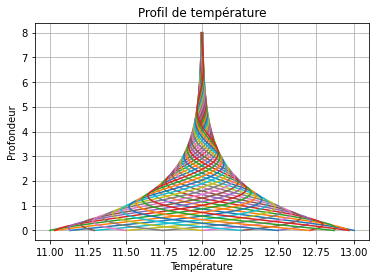

In [11]:
# VITESSE VERS LE BAS

lin = np.linspace(0,8,100)

data = np.zeros((24,100))
depth = np.zeros((24,100))

for i in range(24):
    data[i] = temperature(lin, i*30*3600, 10**(-6))
    depth[i] = lin
    plt.plot(data[i], depth[i])
plt.grid()
plt.ylabel('Profondeur')
plt.xlabel('Température')
plt.title('Profil de température')
plt.show()

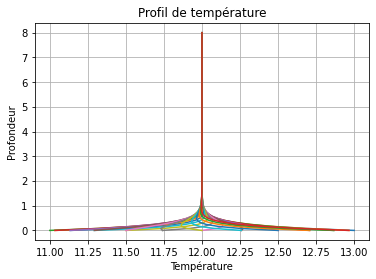

In [12]:
# VITESSE VERS LE HAUT

lin = np.linspace(0,8,100)

data = np.zeros((24,100))
depth = np.zeros((24,100))

for i in range(24):
    data[i] = temperature(lin, i*30*3600, -10**(-6))
    depth[i] = lin
    plt.plot(data[i], depth[i])
plt.grid()
plt.ylabel('Profondeur')
plt.xlabel('Température')
plt.title('Profil de température')
plt.show()

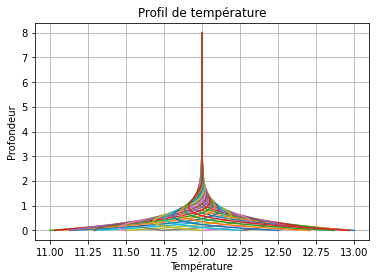

In [13]:
# PROFIL CONDUCTIF PUR

lin = np.linspace(0,8,100)

data = np.zeros((24,100))
depth = np.zeros((24,100))

for i in range(24):
    data[i] = temperature_conductif_pur(lin, i*30*3600)
    depth[i] = lin
    plt.plot(data[i], depth[i])
plt.grid()
plt.ylabel('Profondeur')
plt.xlabel('Température')
plt.title('Profil de température')
plt.show()

Commentaires 

Il semble logique que dans le cas d'une vitesse vers le bas (c'est à dire que le flux va de la rivière vers la nappe), la température de la rivière ait un impact plus profond (on entend par là que les températures fluctuent jusqu'à plusieurs mètres de profondeur, et donc que l'eau de la rivière réchauffe / refroidit l'eau du sous sol jusqu'à quasiment 8 mètres). 

A l'inverse, dans le cas d'une vitesse vers le haut (c'est à dire que le flux va de la nappe vers la rivière), la température de la rivière n'a un impact que superficiel sur la température des eaux en profondeur (la température à partir d'1 mètre de profondeur reste constante à la température de la nappe). Donc la température de l'eau en profondeur fluctue peu.

Enfin, le cas d'un profil conductif pur est une situation intermédiaire aux 2 précédemment évoquées, et cela est cohérent avec le fait que la température fluctue jusqu'à 2m de profondeur, contre 1m dans le cas d'une vitesse vers le haut. 

##### 2.4.1.2 Quantifier et représentez les flux d'énergie relatifs à ces états thermiques

Tracer également des frises temporelles représentant les flux de chaleur advectifs et conductifs relatifs aux trois cas précédents. Commentez ces résultats.

##### 2.4.1.3 Profondeur de pénétration

Par convention on considère que la profondeur de pénétration d'une onde est définie par la profondeur à partir de laquelle l'amplitude est amortie de $e^{-1}$, soit environ d'un tiers.

__Calculer la profondeur de pénétration__

Pour le système conductif pur on veut que la valeur de l'exponentielle np.exp(-np.sqrt(np.pi/(kappa*periode))*profondeur) atteigne -1. <br> Donc que $$\sqrt{{\frac{\pi}{\kappa\times periode}}} \times{profondeur_{penetration}}=1$$ Pour les autres cas, on a $$ profondeur_{penetration}=\frac{1}{a}$$

__Tracer les profondeurs de pénétration__ pour des signaux périodiques dont la période varie entre 1hr et 1 an. Pour des vitesses descendantes, ascendantes variant en valeur absolue entre 10$^{-5}$ et 10$^{-8}$ m.s$^{-1}$. On utilisera des échelles log.

Commentez ces résultats.

In [15]:
def profondeur_penetration_conductif_pur(periode):
    return (periode*kappa/np.pi)**2
def profondeur_penetration(periode, vitesse):
    a = 1/(2*kappa)*(np.sqrt((np.sqrt(vitesse**4 + (8*np.pi*kappa/periode)**2) + vitesse**2)/2) - vitesse)
    return 1/a

In [20]:
#les périodes sont exprimées en seconde
P= np.array([1/24, 1/18, 1/12, 1/4, 1/2, 1, 3, 7, 14, 30, 90, 180, 365])*24*3600
V= np.array([10**-k for k in range(5,9)])

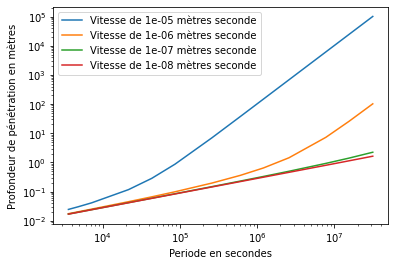

In [38]:
#vitesse ascendante
for vitesse in V:
    pp=[]
    for periode in P:
        prof=profondeur_penetration(periode,vitesse)
        pp.append(prof)
    plt.plot(P,pp,label=f'Vitesse de {vitesse} mètres seconde')
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.yscale('log')
plt.ylabel('Profondeur de pénétration en mètres')
plt.legend()
plt.show()

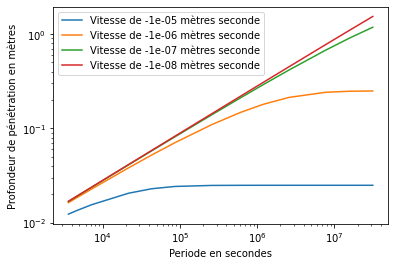

In [39]:
#vitesse descendante
for vitesse in -V:
    pp=[]
    for periode in P:
        prof=profondeur_penetration(periode,vitesse)
        pp.append(prof)
    plt.plot(P,pp,label=f'Vitesse de {vitesse} mètres seconde')
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.yscale('log')
plt.ylabel('Profondeur de pénétration en mètres')
plt.legend()
plt.show()

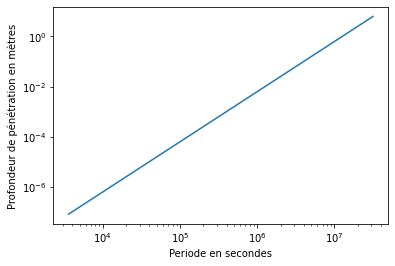

In [40]:
#conductif pur
pp=[]
for periode in P:
    prof=profondeur_penetration_conductif_pur(periode)
    pp.append(prof)
plt.plot(P,pp)
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.yscale('log')
plt.ylabel('Profondeur de pénétration en mètres')
plt.show()

##### 2.4.1.4 Temps d'arrivée d'une perturbation à une profondeur donnée

En analysant la composante ondulatoire de a solution analytique [eq.1], définir le __temps d'arrivée__ à une profondeur $z$ d'une perturbation de période $P$. En déterminer la vitesse la vitesse de propagation de l'onde.

La composante ondulatoire vaut : $\cos\left( \dfrac{2 \pi}{P} t - b z \right)$. Le temps d'arrivée à z correspond au temps pour lequel l'intérieur du cosinus s'annule. Soit $temps_{arrivee} = \frac{P b z}{ 2\pi}$
La vitesse vaut alors le rapport de la profondeur sur le temps. Soit $vitesse_{propagation}=\frac{2\pi}{P\times{b}}$

In [53]:
def vitesse_propagation_conductif_pur(periode):
    beta=np.sqrt(np.pi/(periode*kappa))
    return 2*np.pi/(periode*beta)
def vitesse_propagation(periode, vitesse):
    b = 1/(2*kappa)*(np.sqrt((np.sqrt(vitesse**4 + (8*np.pi*kappa/periode)**2) - vitesse**2)/2))
    return 2*np.pi/(periode*b)

__Tracer les vitesses de propagation__ pour une gamme de vitesses variant entre 1e-5 m/s et 1e-8 m/s, et pour le cas conductif. Commentez vos résultats

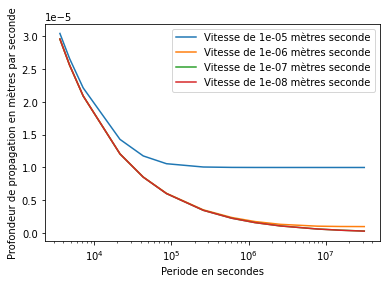

In [54]:
#vitesse ascendante
for vitesse in V:
    vp=[]
    for periode in P:
        vit=vitesse_propagation(periode,vitesse)
        vp.append(vit)
    plt.plot(P,vp,label=f'Vitesse de {vitesse} mètres seconde')
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.ylabel('Profondeur de propagation en mètres par seconde')
plt.legend()
plt.show()

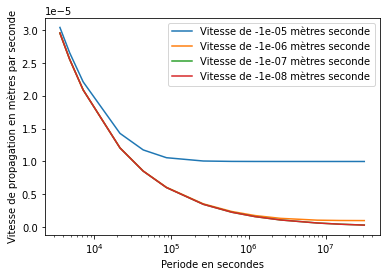

In [55]:
#vitesse descendante
for vitesse in -V:
    vp=[]
    for periode in P:
        vit=vitesse_propagation(periode,vitesse)
        vp.append(vit)
    plt.plot(P,vp,label=f'Vitesse de {vitesse} mètres seconde')
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.ylabel('Vitesse de propagation en mètres par seconde')
plt.legend()
plt.show()

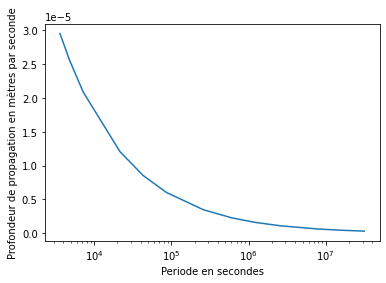

In [56]:
#conductif pur
vp=[]
for periode in P:
    vit=vitesse_propagation_conductif_pur(periode)
    vp.append(vit)
plt.plot(P,vp)
plt.xscale('log')
plt.xlabel('Periode en secondes')
plt.ylabel('Profondeur de propagation en mètres par seconde')
plt.show()

#### 2.4.2 Sollicitations multi-périodiques
 
On considère maintenant deux signaux périodiques emboîtés, l'un annuel (d'amplitude 6 °C), l'autre journalier d'amplitude 1°C.

Représenter tout d'abord les deux influences séparemment puis voir comment elles se combinent dans le milieu pour les deux cas infliltrant et exfiltrant à une vitesse de Darcy de +/-1e-6 $m. s^{-1}$. Représentez les profils verticaux et les frises.

Commentez les résultats obtenus.

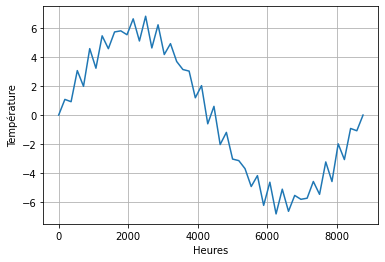

In [41]:
lin = np.linspace(0,24*365)
temp = 6*np.sin(np.pi*2/(365*24)*lin) + np.sin(np.pi*2/(24)*lin)

plt.plot(lin, temp)
plt.grid()
plt.ylabel('Température')
plt.xlabel('Heures')
plt.title('')
plt.show()


